# Read files

Read the .csv files containing dataframes whose columns are [states, counts_p1, counts_p2, ..., counts_pn]. Build a dataframe for every single layer (counts_pi), so that eventually you will display n dataframes

### Functions

In [5]:
# !pip install ipynb
from ipynb.fs.full.useful_functions import *

### Read "random initialization" files

In [12]:
##### CHANGE THESE
# directory = "uMAIL3_DIM6_settembre/random/"
directory = ""
header = "15-09@15h41m_dim6_mail5_all1_random_p3_10ra_k0.085_BOUNDS[0,2pi]x[None,None]_pars0[0,2pi]x[-1000,1000]_data"

In [13]:
DATA_FILENAME = directory + header +".txt"
FILENAME = DATA_FILENAME.split("_data")[0] + ".csv"
print(FILENAME)

##### EXTRAPOLATE INFORMATION FROM THE FILENAME
PROBLEM_DIM, instance, init_name, p, random_attempts, k = define_parameters_from_filename(DATA_FILENAME)
print(PROBLEM_DIM, instance, init_name, p, random_attempts, k)

##### WITH THIS INFORMATION, GET THE INSTANCE SETS
U, subsets_dict = define_instance(PROBLEM_DIM, instance)

##### FIND FEASIBLE STATES, ENERGIES, EXACT COVERS
states, energies, states_feasible, energies_feasible, EXACT_COVERS = find_spectrum(U, subsets_dict, PROBLEM_DIM, k)
print("\nEXACT_COVERS: ", EXACT_COVERS)

15-09@15h41m_dim6_mail5_all1_random_p3_10ra_k0.085_BOUNDS[0,2pi]x[None,None]_pars0[0,2pi]x[-1000,1000].csv
6 5 all1 3 10 0.085

 ## PROBLEM_DIM chosen: 6 ##


 ## instance chosen: 5 ##

subsets:
 [{11, 7}, {1, 2, 4, 5, 9, 11}, {1, 3, 4, 6, 8}, {2, 5}, {3, 6, 7, 8, 10, 12}, {9, 10, 12}]
U:
 {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

EXACT_COVERS:  ['010010', '101101']


string 3 

i_best is 3


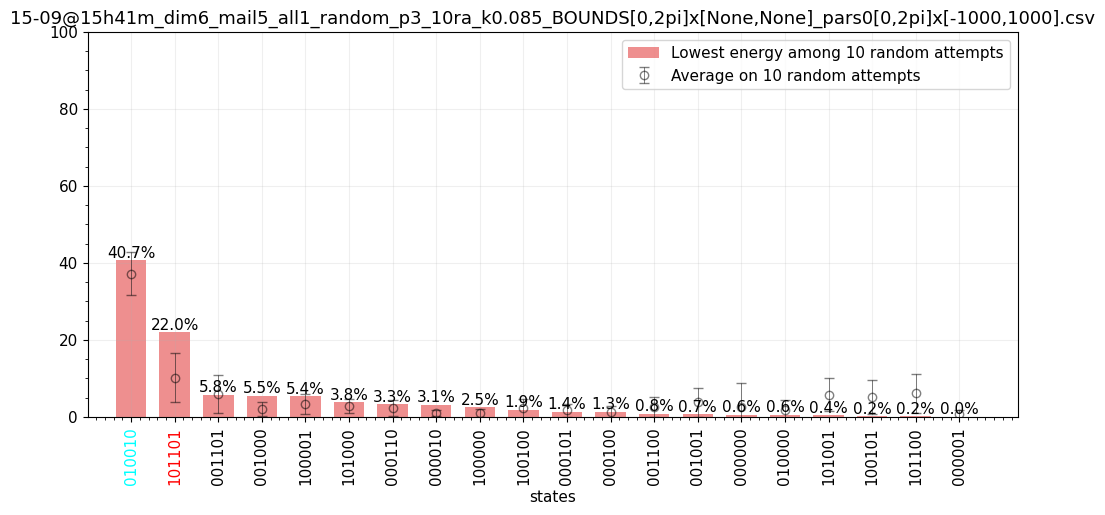

In [14]:
##### UPLOAD THE DATAFRAME FROM FILE
df = pd.read_csv(FILENAME, dtype = str).set_index('states')
df = df.astype(float).fillna(0.0)


##### COMPUTE PERCENTAGES AND ADD AVERAGE COLUMN
total = df.sum()
percentage = (df/ total) * 100


percentage['average'] = percentage.mean(numeric_only=True, axis=1)
percentage['std'] = percentage[percentage.columns[:-1]].std(numeric_only=True, axis=1)

##### FIND THE BEST HISTOGRAM INDEX (i_best) BASED ON THE MINIMUM ENERGY FOUND
with open(DATA_FILENAME, 'r') as DATA_FILE:
    for line in DATA_FILE:
        if 'Attempt that reached the best result with' in line:                
            string = line.split('#')[1]
            i_best = string.split(' ')[0]
            print("string", string)
            print("i_best is", i_best)
            
##### THE COLUMN CORRESPONDING TO THE BEST RESULT
column_best = f'counts_p{p}_{i_best}of{random_attempts}'


##### KEEP THE BEST AND THE AVERAGE RESULT
percentage = percentage[[column_best, "average", "std"]]
percentage = percentage.sort_values(column_best, ascending=False)


##### FIGURE
N=11
plt.figure(figsize=(12,5))
ax = sns.barplot(x="states", y=column_best, data=percentage, width=0.7, color='red', alpha=0.5, 
            label=f"Lowest energy among {random_attempts} random attempts")

# Make labels with percentages.
labels = percentage[column_best].round(1).astype('str') + '%'
for container in ax.containers:
        ax.bar_label(container, labels=labels, fontsize=N)
        
# # Display errors, but just for the "average" bars.
x_coords = [p.get_x() + 0.5 * p.get_width() for p in ax.patches] 
y_coords = percentage["average"]
ax.errorbar(x=x_coords, y=y_coords, yerr=percentage["std"], linestyle="",
            markerfacecolor='none', linewidth=1,
            marker='o', color='k', ecolor='k', elinewidth=0.7, capsize=3.5, 
            barsabove=True, alpha=0.5, 
            label=f"Average on {random_attempts} random attempts")

# Highlight exact covers' ticks with red.
# df_for_ticks = percentage.copy()
# df_for_ticks["states"] = df_for_ticks.index
highlight_correct_ticks(ax, percentage.index, EXACT_COVERS)

# Plot refinements.
plt.title(FILENAME, fontsize=N+2)
plt.xlabel("states", fontsize=N)
plt.ylabel("", fontsize=N)
plt.xticks(fontsize=N)
plt.yticks(fontsize=N)
plt.xlim(xmin=-1)
plt.ylim(ymin=0, ymax=100)
plt.minorticks_on()
plt.grid(alpha=0.2)
plt.legend(fontsize=N)
plt.show()

### Read "parameters fixing" files

In [10]:
max_p = 3

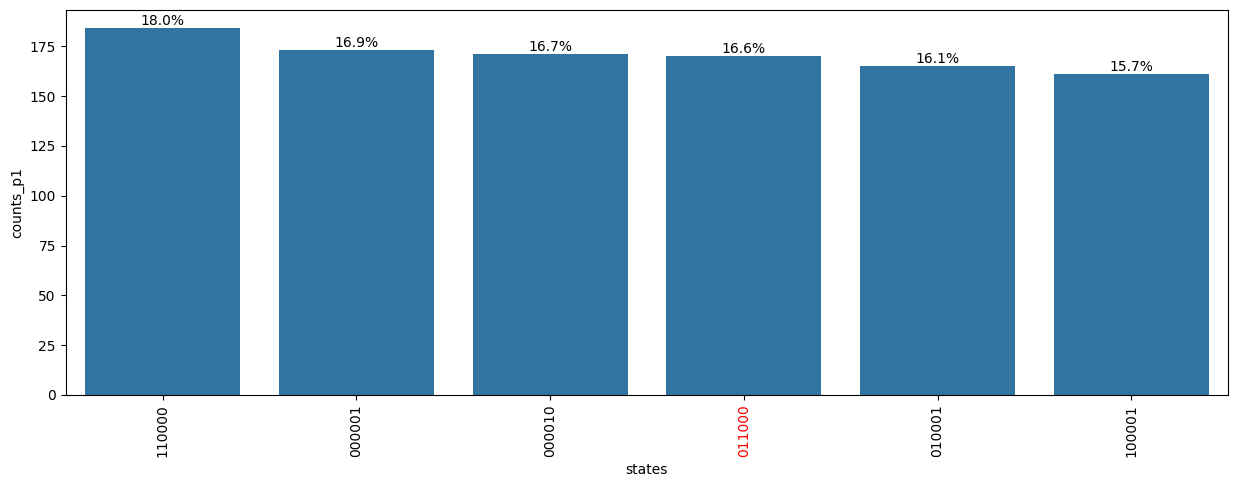

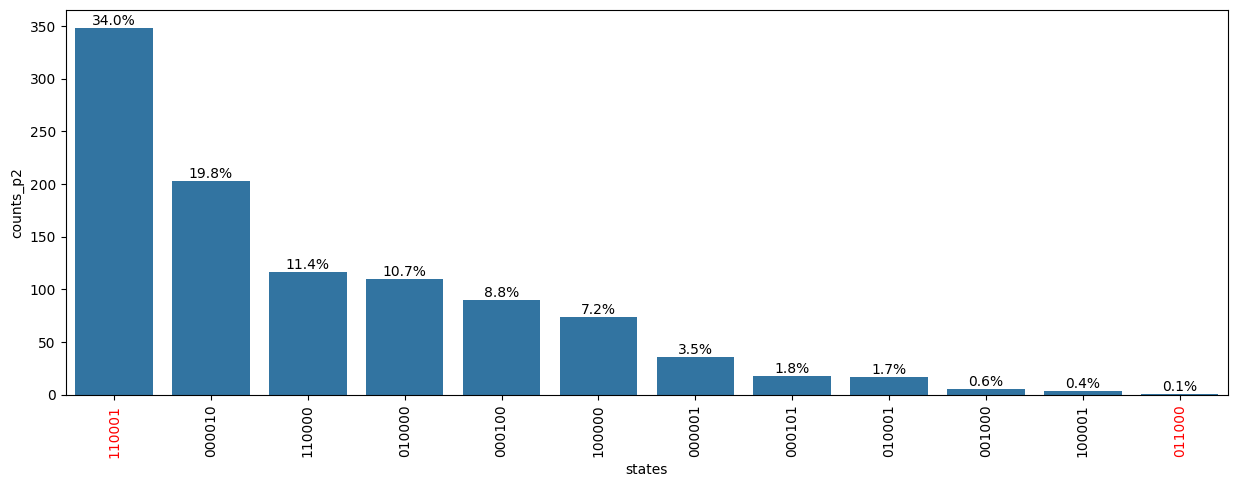

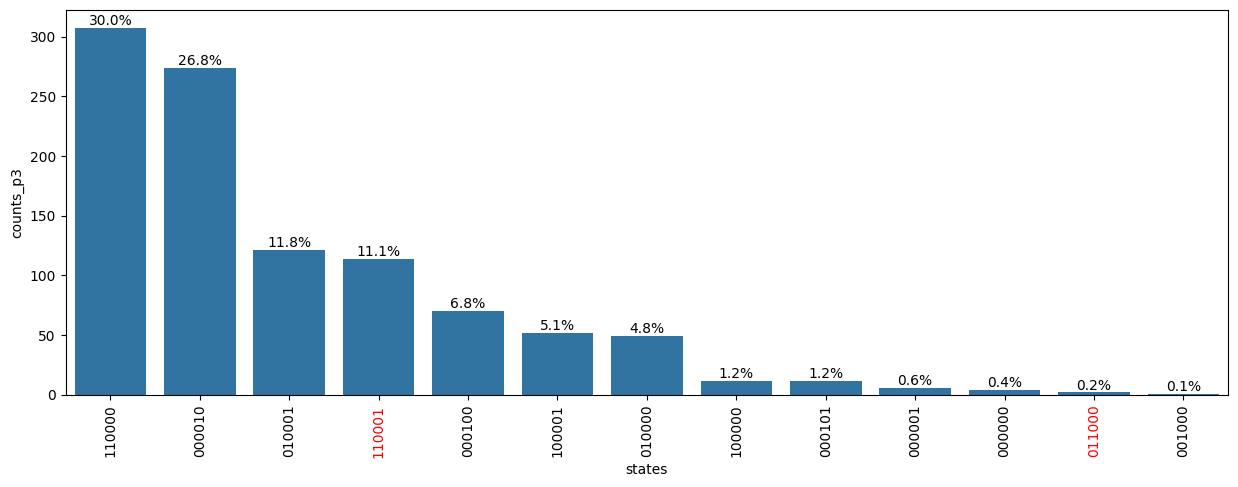

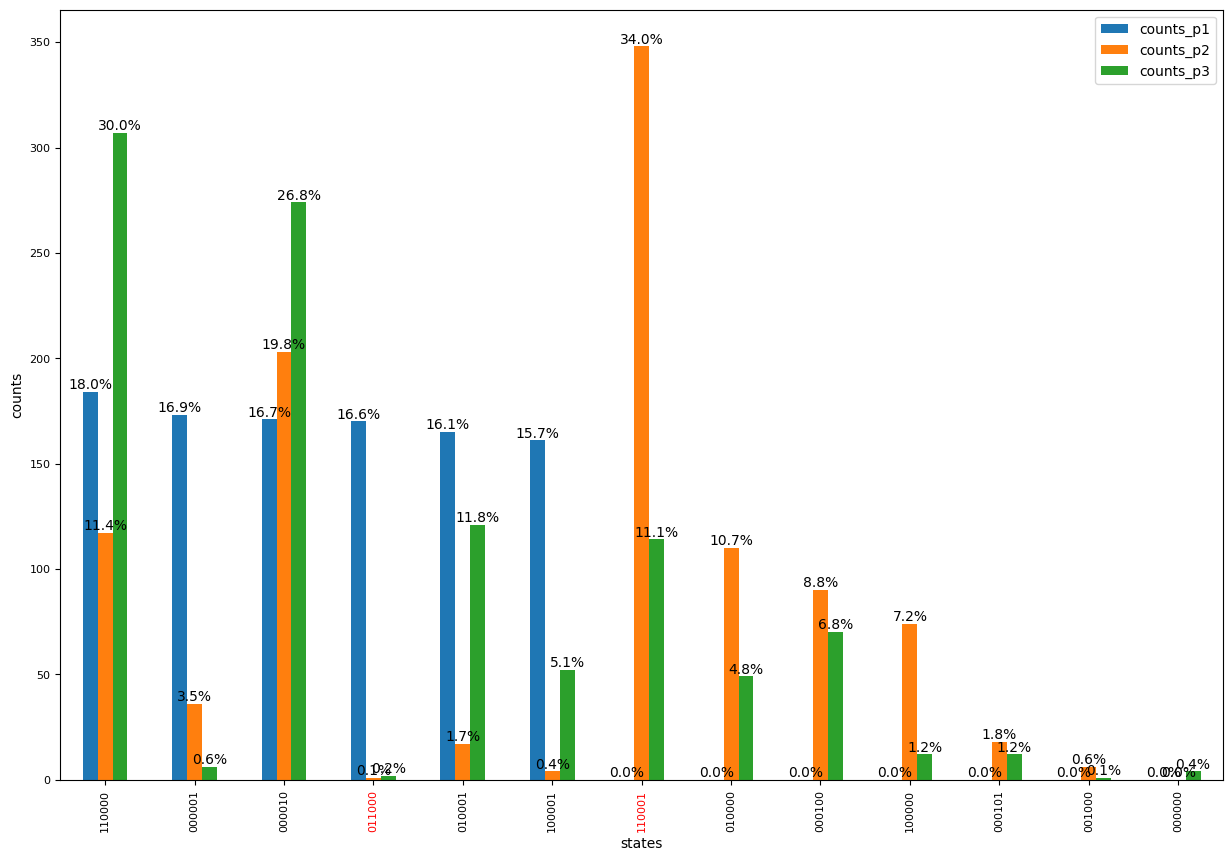

In [16]:
most_frequent_states = []

labels = []

for p in range(1, max_p+1):

    # Read from csv.
    FILENAME = f"10-09_dim6_mail3_all1_maxp3_50ra_k1_BOUNDS_p{p}.csv"
    df = pd.read_csv(FILENAME, dtype = {'states':"str", f'counts_p{p}':"Int64"})
    most_frequent_states.append([df["states"].iloc[0], df[f'counts_p{p}'].iloc[0]])
    
    # Plot the dataframe.
    plt.figure(figsize=(15,5))
    df = df.sort_values(f'counts_p{p}', ascending=False)
    ax = sns.barplot(x='states', y=f'counts_p{p}', data=df)
    highlight_correct_ticks(ax, df, U, subsets_dict)
    
    # Make labels with percentages.
    labels.append(df[f'counts_p{p}'].apply(lambda x: (x/df[f'counts_p{p}'].sum())*100).round(1).astype('str') + '%')
    for container in ax.containers:
        ax.bar_label(container, labels=labels[p-1])
    plt.show()
    
    # Merge dataframes.
    if p == 1:
        df_final = df
    else:
        df_final = pd.merge(df_final, df, on="states", how="outer")    


# Plot all the dataframes in one picture.
df_final.plot(x='states', kind="bar", figsize=(15,10), fontsize=8, stacked=False)
df_final = df_final.fillna(0)

# Make labels with percentages.
ax1 = plt.gca()
ax1.set_ylabel("counts")
for i,container in enumerate(ax1.containers):
    p = i+1
    labels = df_final[f'counts_p{p}'].apply(lambda x: (x/df_final[f'counts_p{p}'].sum())*100).round(1).astype('str') + '%'
    ax1.bar_label(container, labels=labels)
highlight_correct_ticks(plt.gca(), df_final, U, subsets_dict)

### Read "linear-interpolation" files

In [28]:
DATA_FILENAME = "09-09_dim6_mail3_all1_random_k1_linear_interpolation_data.txt"

In [29]:
with open(DATA_FILENAME, 'r') as DATA_FILE:
    for line in DATA_FILE:
        if 'BETAS' in line:                
            BETAS = eval(line.split('=')[1])
        if 'GAMMAS' in line:                
            GAMMAS = eval(line.split('=')[1])
            
print(BETAS,GAMMAS)
# print([type(x) for x in BETAS])
# BETAS = [eval(x) for x in BETAS]
# GAMMAS = [eval(x) for x in GAMMAS]
print(len(BETAS))

[[3.8666067012153844, 1.192624999477176, 0.5169022220500105, 0.668191191359472, 2.3069173694812237, 0.9142431363908061, 3.0102844870087035, 0.8251571440227721, 0.27165049822981713, 0.3546404568446264], [2.8116425253479003, -0.8865625178846659, 2.148615162157242, -0.24853875881708154, 2.841937455442533, 0.7420596591964119, 4.1352009786279105, 4.405504262027229, 1.9006294085893503], [2.7755515963601036, -0.9419251586465545, 0.8009011123206711, 2.0258489373084583, -1.6120442626081668, 0.3798360033644037, 2.2132114632785083, 2.3847063900572945], [0.7636206067562503, 3.9316352376401724, 3.131296275219853, 4.782062726381355, 2.142024057443109, 2.571404339634702, 0.6675034604952921], [1.4335133532504374, 1.0956582123608678, 2.4945901791435925, 2.681784669071039, 0.13749070688423604, 0.5254776195733177], [0.46227834318803573, 3.819098177138083, 2.213964369895578, 1.0864643256898066, 0.6852260034046584], [2.016692525227384, 0.15508976245156758, 3.0586060008670835, 3.154564029613086], [2.4295694

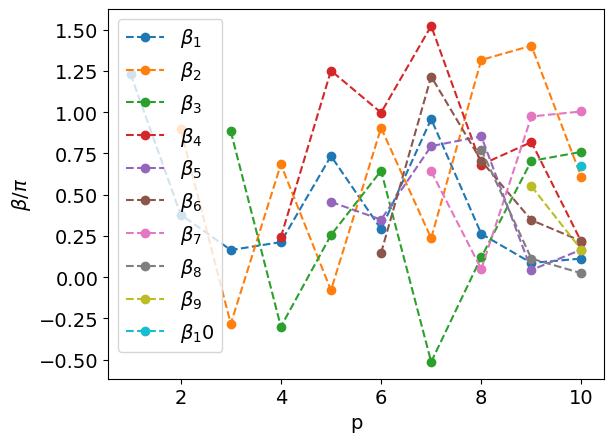

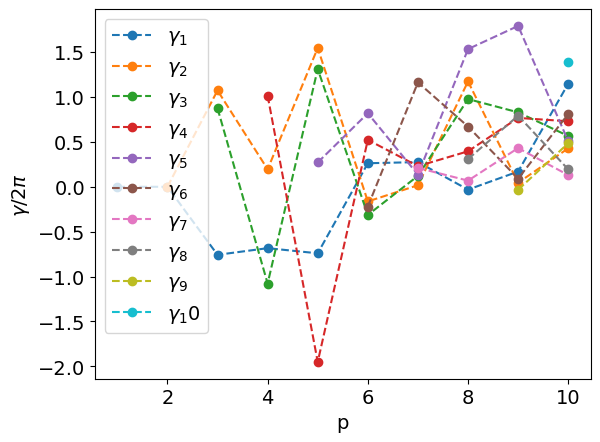

In [30]:
MEDIUM_SIZE = 14

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title


##### PLOT
plt.figure()
p_max = len(BETAS)
for i in range(len(BETAS)):
    p_vec = np.linspace(i+1, p_max, p_max-(i+1)+1)
    y = np.array(BETAS[i])/np.pi
    plt.plot(p_vec, y, marker='o', linestyle='--', label=r'$\beta_{0}$'.format(i+1))

plt.xlabel("p")
plt.ylabel(r"$\beta/\pi$")
plt.legend()
plt.show()

plt.figure()
for i in range(len(GAMMAS)):
    p_vec = np.linspace(i+1, p_max, p_max-(i+1)+1)
    y = np.array(GAMMAS[i])/(2*np.pi)
    plt.plot(p_vec, y, marker='o', linestyle='--', label=r'$\gamma_{0}$'.format(i+1))

plt.xlabel("p")
plt.ylabel(r"$\gamma / 2\pi$")
plt.legend()
plt.show()

### exact cover's occurrence VS p


 df_final:
      states  counts_p1  counts_p2  counts_p3
0  00001000        141        106         67
1  10001000        133         26        277
2  01000010        123         18         13
3  11010000        106        139         17
4  00100001         97        100         42

 mask:
 0     False
1      True
2     False
3     False
4     False
5      True
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
Name: states, dtype: bool

df_exact_covers:
      states  counts_p1  counts_p2  counts_p3
1  10001000        133         26        277
5  01110100         95        289        294

exact_covers:
 ['10001000' '01110100']

solution:
 10001000


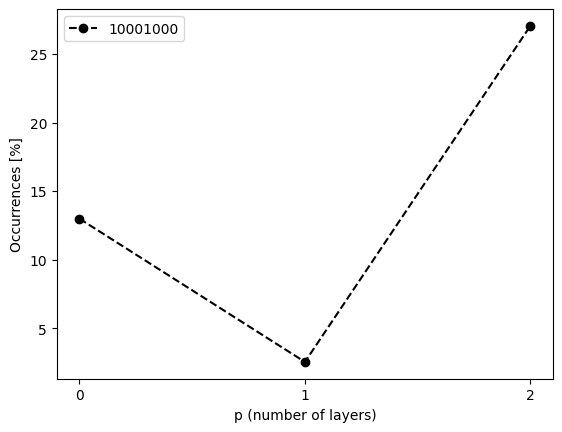

In [9]:
# Find the exact cover 
mask = df_final['states'].apply(lambda x : compute_energy_Lucas(x, U, subsets_dict)) == 0
print("\n df_final:\n", df_final.head())
print("\n mask:\n", mask)

df_exact_covers = df_final[mask]
print("\ndf_exact_covers:\n", df_exact_covers.head())
exact_covers = df_exact_covers["states"].values
print("\nexact_covers:\n", exact_covers)
solution =  df_exact_covers["states"].iloc[0]
print("\nsolution:\n", solution)

counts = df_exact_covers.iloc[0, 1:].values
layers = [str(i) for i in np.arange(len(counts))]


# ********************* plot the figure *******************************
plt.figure()
total = 1024
plt.plot(layers, counts*100/total, linestyle='--', color='k', marker='o', label=f"{solution}")
plt.ylabel("Occurrences [%]")
plt.xlabel("p (number of layers)")
plt.legend()

plt.show()

### most frequent state's occurrence VS  p

[13.76953125, 28.22265625, 28.7109375] [False, True, True]


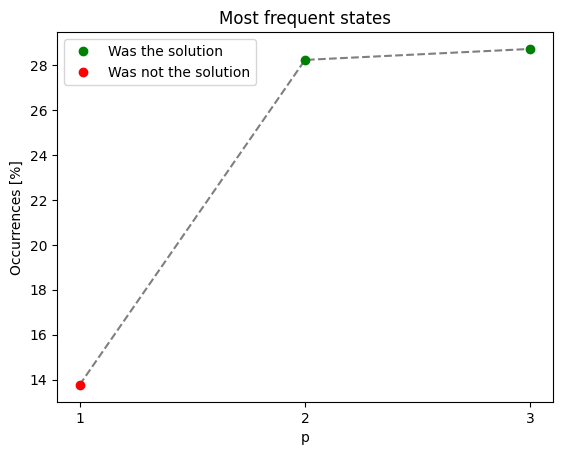

In [10]:
probs = []
mask = [] # True if the most frequent state is the correct state, False otherwise

total = 1024

for tup in most_frequent_states:
    state = tup[0]
    count = tup[1]
    if(state in exact_covers):
        mask.append(True)
    else:
        mask.append(False)
        
    probs.append(100 * count / total)

print(probs, mask)
mask = np.array(mask)
probs = np.array(probs)

# ********************* plot the figure *******************************
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import MaxNLocator

fig, ax = plt.subplots()
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

p = np.arange(1,max_p+1)
plt.errorbar(p[mask], probs[mask], fmt='o', color='g', label='Was the solution')
plt.errorbar(p[~mask], probs[~mask], fmt='o',  color='r', label='Was not the solution')
plt.plot(p, probs, linestyle='--', color='k', alpha = 0.5)

plt.ylabel("Occurrences [%]")
plt.xlabel("p")
plt.legend()
plt.title("Most frequent states")
plt.show()